<b>¡Hola Constanza!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b> <a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.  
¡Empecemos!


# **PROYECTO SPRINT 10**

## **Descripción del proyecto**

Eres analista en una gran tienda online. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

### **Descripción de los datos**

#### Datos utilizados en la primera parte del proyecto

1. /datasets/hypotheses_us.csv
- Hypotheses: breves descripciones de las hipótesis.
- Reach: alcance del usuario, en una escala del uno a diez.
- Impact: impacto en los usuarios, en una escala del uno al diez.
- Confidence: confianza en la hipótesis, en una escala del uno al diez.
- Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.


#### Datos utilizados en la segunda parte del proyecto

2. /datasets/orders_us.csv
- transactionId: identificador de pedido.
- visitorId: identificador del usuario que realizó el pedido.
- date: fecha del pedido.
- revenue: ingresos del pedido.
- group: el grupo del test A/B al que pertenece el usuario.

3. /datasets/visits_us.csv
- date: la fecha.
- group: grupo de la prueba A/B.
- visits: el número de visitas en la fecha especificada en el grupo de pruebas A/B - especificado.

Asegúrate de preprocesar los datos. Es posible que haya errores en los datasets originales; por ejemplo, algunos de los visitantes podrían haber entrado tanto en el grupo A como en el grupo B.

## **Parte 1. Priorizar hipótesis**

El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda online con Reach, Impact, Confidence y Effort especificados para cada una.

### **1.1. Framework ICE y RICE**

Aplicar el framework ICE y RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [1]:
# Importar las librerías 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import datetime as dt

In [2]:
# Leer los datos del DataFrame 'Hypothesis'

hipotesis = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

hipotesis

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [3]:
# Calcular las métricas ICE y RICE

hipotesis['ICE'] = (hipotesis['Impact'] * hipotesis['Confidence']) / hipotesis['Effort']

hipotesis['RICE'] = (hipotesis['Reach'] * hipotesis['Impact'] * hipotesis['Confidence']) / hipotesis['Effort']

<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Has calculado las métricas ICE y RICE de manera efectiva. Estas métricas son fundamentales para priorizar hipótesis en función de su impacto potencial, confianza y esfuerzo requerido. La precisión en su cálculo es crucial para una toma de decisiones informada en el contexto de negocio.
</div>


In [4]:
# Mostrar el DataFrame ordenado por ICE y RICE

display(hipotesis.sort_values(by='ICE', ascending=False))

display(hipotesis.sort_values(by=['RICE'], ascending=False))

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


<div class="alert alert-block alert-warning">
<b>Celda [4]</b> <a class="tocSkip"></a><br>
Has ordenado correctamente el DataFrame por las métricas ICE y RICE. Sería beneficioso incluir una interpretación de estos resultados para entender mejor qué hipótesis podrían tener un mayor impacto en el negocio. Esto ayudará a priorizar acciones basadas en las métricas calculadas.
</div>


In [5]:
hipotesis['Hypothesis']

0    Add two new channels for attracting traffic. T...
1    Launch your own delivery service. This will sh...
2    Add product recommendation blocks to the store...
3    Change the category structure. This will incre...
4    Change the background color on the main page. ...
5    Add a customer review page. This will increase...
6    Show banners with current offers and sales on ...
7    Add a subscription form to all the main pages....
8    Launch a promotion that gives users discounts ...
Name: Hypothesis, dtype: object

### **1.2. Análisis del las métricas ICE y RICE**

Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

El DataFrame 'hipotesis', cuenta con sus columnas de 'Hipótesis', 'Alcance', 'Impacto', 'Confianza' y 'Esfuerzo' con las cuales se pudieron realizar los cálculos de las métricas ICE y RICE. En esta tabla se analizaron 9 hipótesis diferetes y para saber la prirización entre ellas se obtuvieron las métricas prorizándolas de la siguiente forma:

Para la métrica de ICE se obtuvieron estas tres hipótesis como las mejor calificadas de acuerdo al impacto, confianza y esfuerzo:
8. Lanzar una promoción que ofrezca descuentos a los usuarios
0. Añadir dos nuevos canales para atraer tráfico.
7. Añadir un formulario de suscripción a todas las páginas principales.

Mientras que para la métrica RICE, las tres hipótesis con mejor calificación además de las valores ICE, también el alcance son las siguientes:
7. Añadir un formulario de suscripción a todas las páginas principales.
2. Agregar bloques de recomendación de productos a la tienda.
0. Añadir dos nuevos canales para atraer tráfico.

En ambas métricas, tanto para ICE como para RICE las hipótesis que coinciden son una en la que se propone "añdir dos nuevos canales para atraer tráfico" y la otra "añadir un formulario de suscripción a todas las páginas principales", entre estas dos se podrí basa el estudio de la prueba A/B.

## **Parte 2. Análisis del test A/B**

Realizaste una prueba A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visits_us.csv.

In [6]:
# Preparar los datos para el análisis del teste A/B

In [7]:
# Leer los datos del DataFrame 'Orders'

orders = pd.read_csv('/datasets/orders_us.csv')

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


<div class="alert alert-block alert-success">
<b>Celda [7]</b> <a class="tocSkip"></a><br>
Has cargado y verificado correctamente el conjunto de datos 'Orders'. Este paso es esencial para asegurar que los datos estén en el formato adecuado para el análisis posterior, lo que es crucial para la integridad de tus resultados.
</div>


In [8]:
# Cambio de tipo de datos de la columna 'date' de object a datetime

orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [9]:
# Leer los datos del DataFrame 'Hypothesis'

visits = pd.read_csv('/datasets/visits_us.csv')

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
# Cambio de tipo de datos de la columna 'date' de object a datetime

visits['date'] = pd.to_datetime(visits['date'], format='%Y-%m-%d')

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


<div class="alert alert-block alert-success">
<b>Celda [10]</b> <a class="tocSkip"></a><br>
La conversión de tipos de datos para el DataFrame 'visits' se ha realizado correctamente. Esto es importante para facilitar el análisis temporal y asegura que los datos estén listos para un análisis más detallado.
</div>


En esta parte del análisis se tienen dos DataFrame:
1. 'orders', en donde se tienen 1197 filas y las columnas 'transactionId', 'visitorId', 'date' a la cual se le realizó el cambio del tipo de datos de object a datetime, y las columnas 'revenue' y 'group'.
2. 'visits', compuesta por 62 filas y las columnas 'date' a la cual se le realizó el cambio del tipo de datos de object a datetime, y las columnas 'group' y 'visits'.

In [11]:
# Filtrar los datos del DataFrame 'orders' con numpy logical

dates_groups = orders[['date', 'group']].drop_duplicates()

orders_agregated = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
        'date': 'max',
        'group': 'max', 
        'transactionId': 'nunique', 
        'visitorId': 'nunique', 
        'revenue': 'sum'
    }), axis=1
).sort_values(by=['date', 'group'])

orders_agregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5


In [12]:
# Filtrar los datos del DataFrame 'visits' con numpy logical

visits_agregated = dates_groups.apply(
    lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({
        'date': 'max',
        'group': 'max', 
        'visits': 'sum'
    }), axis=1
).sort_values(by=['date', 'group'])

visits_agregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [13]:
# Unir los DataFrame de 'orders_agregated' y 'visits_agregated'

cumulative_data = orders_agregated.merge(visits_agregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

cumulative_data.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


<div class="alert alert-block alert-warning">
<b>Celda [13]</b> <a class="tocSkip"></a><br>
Al unir los DataFrames 'orders_agregated' y 'visits_agregated', es crucial verificar que no haya duplicados o inconsistencias. Esto garantiza la integridad de los datos combinados y evita errores en el análisis posterior.
</div>


In [14]:
# Encontrar las fechas mínimas y máximas de las órdenes

print(orders['date'].min())
print(orders['date'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00


Para obtener un DataFrame con los datos fusionados en la tabla 'cumulative_data' se realizó filtrado en: 
1. 'orders', se buscaron y eliminaron los duplicados, luego se filtró para cada combinación (date, group) en dates_groups, para obtener el número acumulado de transacciones únicas, el número acumulado de visitantes únicos, el ingreso acumulado total para cada grupo, obteniendo así el DataFrame 'orders_agregated'.

2. 'visits', se filtró para obtener todas las visitas que pertenecen a uno de los grupos A o B y que ocurrieron en una fecha. De esta forma se obtiene un acumulado de visitas por grupo y fecha, obteniendo así el DataFrame 'visits_agregated'.

3. Se unieron ambos DataFrame obtenidos 'orders_agregated' y 'visits_agregated' con los datos acumulados de órdenes con los datos acumulados de visitas, por la fecha y el grupo A o B de la prueba. Así se obtuvo el DataFrame 'cumulative_data' que contiene una fila por cada combinación (date, group), con todas las métricas acumuladas de ambas tablas.

### **2.1. Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.**

In [15]:
# Realizar filtración lógica para encontrar el ingreso acumulado en cada grupo A y B

cumulative_revenueA = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]

cumulative_revenueB = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]

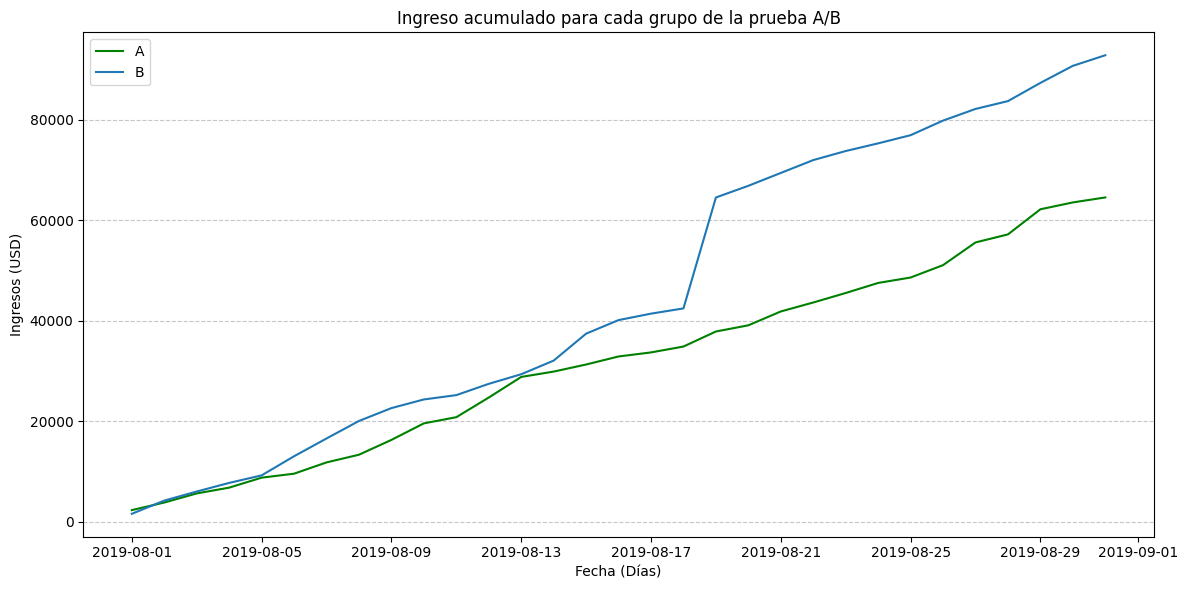

In [16]:
# Realizar la gráfica del ingreso acumulado para cada grupo

plt.figure(figsize=[12, 6])
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue'], label='A', color='green')
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue'], label='B')
plt.title('Ingreso acumulado para cada grupo de la prueba A/B')
plt.xlabel('Fecha (Días)')
plt.ylabel('Ingresos (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()


<div class="alert alert-block alert-success">
<b>Celda [16]</b> <a class="tocSkip"></a><br>
La visualización del ingreso acumulado para cada grupo es clara y bien estructurada. Esta gráfica es útil para observar cómo evolucionan los ingresos en cada grupo a lo largo del tiempo y puede ayudar a identificar tendencias significativas.
</div>


Se realizó una filtración lógica por fecha, ingreso y ordenes para encontrar el ingreso acumulado en cada grupo A y B. 
Luego se realizó la gráfica de líneas para comparar el comportamiento del ingreso acumulado en el tiempo de duración de la prueba, de esta gráfica se observa lo siguiente:
- En los primeros 5 días, el ingreso en ambos grupos fue similar.
- Del día 5 al día 13, los ingresos acumulados del grupo A fueron ligeramente menores a los del grupo B, apar estos mismos días.
- A partir del día 13, se observa un punto de inflexión en donde se observa claramente, que los ingresos del grupo B fueron mucho mayor a los grupo A hasta el final de la prueba.
- El último día de la prueba, el grupo A presentó un ingreso total de 62.000 USD aproximamente, mientras que los ingresos totale del grupo B fueron superiores a los 90.000 USD.


### **2.2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.**

In [17]:
# Encontrar la relación entre las proporciones del tamaño de pedido para cada grupo 

proporcionA = cumulative_revenueA['revenue'] / cumulative_revenueA['orders']

proporcionB = cumulative_revenueB['revenue'] / cumulative_revenueB['orders']

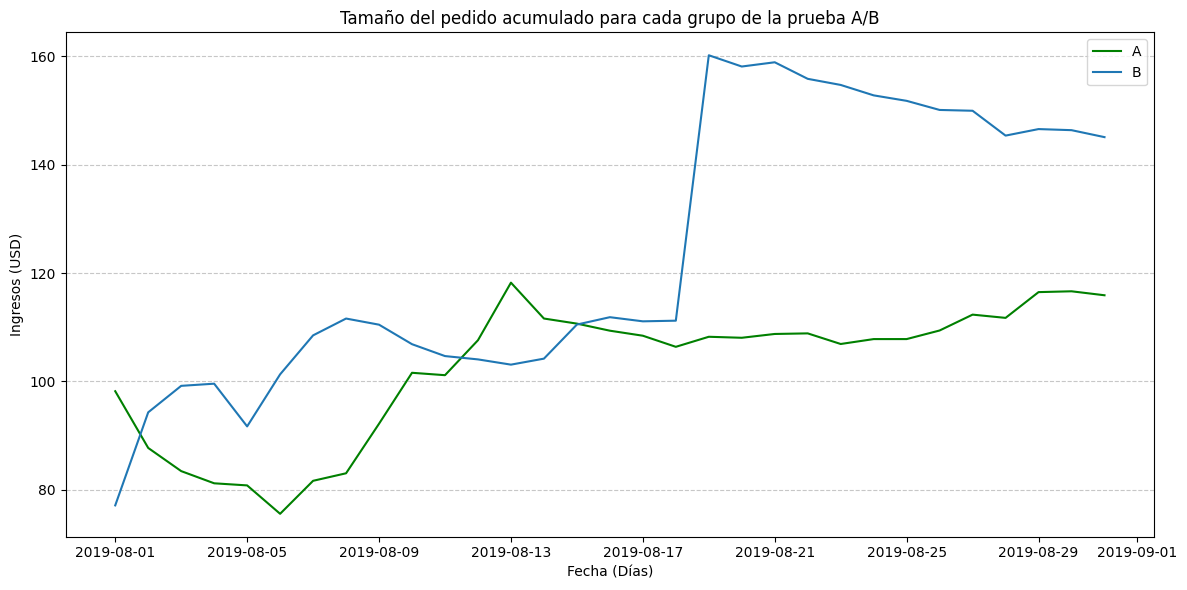

In [18]:
# Realizar la gráfica del tamaño del pedido promedio acumulado para cada grupo

plt.figure(figsize=[12, 6])
plt.plot(cumulative_revenueA['date'], proporcionA, label='A', color='green')
plt.plot(cumulative_revenueB['date'], proporcionB, label='B')
plt.title('Tamaño del pedido acumulado para cada grupo de la prueba A/B')
plt.xlabel('Fecha (Días)')
plt.ylabel('Ingresos (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()


Para encontrar la relación entre las proporciones del tamaño de pedido se divieron los ingresos entre las ordenes para cada grupo.
Luego se realizó la gráfica de líneas para comparar la relación entre los ingresos y las órdenes para cada grupo, de esta gráfica se observa lo siguiente:
- La proporción del grupo A inició con un decremento y continuó así hasta el día 6 llegando a obtener un valor cercano a 75 USD, luego, tuvo un incremento hasta el día 13 cercano a los 120 USD y a apartir de esta fecha tuvo una estabilización hasta el final de la prueba llegando a estar cercano a los 118 USD.
- La proporción del grupo B a diferencia del A inició con incremento permaneciendo así hasta el final de la prueba. Sin embargo, para el día 18 se nota un gran incremento en la proporción de 100 USD a 160 USD, llegando a tener una cierta estabilización para el final de prueba con un valor de 145 USD aproximadamente.
- Para el último día de la prueba hay una diferencia entre los grupos, de 27 USD aproximadamente, siendo el grupo B el que presenta una mayor proporción entre ingresos y órdenes.

### **2.3. Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.**

In [19]:
# Unir los DataFrame de los ingresos acumulados de cada grupo de la prueba A/B

merged_cumulative_revenue = cumulative_revenueA.merge(cumulative_revenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

merged_cumulative_revenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2356.8,24,1620.0,21
1,2019-08-02,3860.3,44,4243.8,45
2,2019-08-03,5675.5,68,6050.6,61
3,2019-08-04,6822.1,84,7767.9,78
4,2019-08-05,8810.2,109,9262.9,101


In [20]:
# Encontrar la proporción entre cada grupo

x = merged_cumulative_revenue['date']
y = (merged_cumulative_revenue['revenueB'] / merged_cumulative_revenue['ordersB']) / ((merged_cumulative_revenue['revenueA'] / merged_cumulative_revenue['ordersA'])) -1
y.head()

0   -0.214431
1    0.074915
2    0.188429
3    0.226225
4    0.134662
dtype: float64

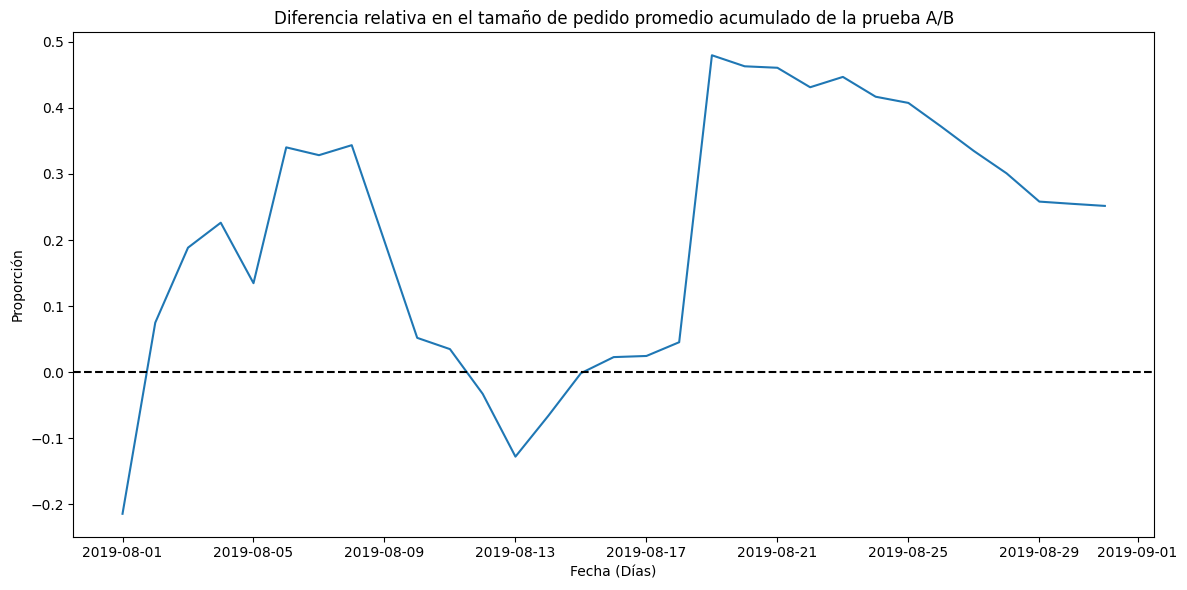

In [21]:
# Graficar la diferencia relativa 

plt.figure(figsize=[12, 6])
plt.plot(x, y)
plt.title('Diferencia relativa en el tamaño de pedido promedio acumulado de la prueba A/B')
plt.xlabel('Fecha (Días)')
plt.ylabel('Proporción')
plt.axhline(y=0, color='black', linestyle='--')
plt.tight_layout()


<div class="alert alert-block alert-warning">
<b>Celda [21]</b> <a class="tocSkip"></a><br>
La gráfica de la diferencia relativa en el tamaño de pedido promedio es informativa. Considera agregar líneas de referencia o anotaciones para resaltar cambios significativos o puntos de interés en la tendencia, lo que podría facilitar la interpretación de los resultados.
</div>


De la gráfica se puede observar que existe una diferencia positiva en el tamaño promedio del pedido acumulado para el grupo B durante la mayor parte de la prueba. Al final del período de análisis, este grupo B sigue teniendo un tamaño de órdenes promedio un 25% mayor con respecto al grupo A.

Al inicio los picos pronunciados puede deberse a que el tamań promedio de las órdenes es muy sensible a los pedidos individuales de alto valor (valores atípicos). Un pedido muy grande puede alterar significativamente el promedio, especialmente al inicio de una prueba donde no se cuentan con tantos valores.

Para el día 9 se observa una disminución en la proporción de la relación entre los grupos, llegando a tener una diferencia negativa entre los días 11-13 en el tamaño promedio del pedido acumulado para el grupo B, a partir del cuál aumenta hasta el día 18 y luego empieza mostrar una tendencia a la estabilización.

La prueba podría necesitar más tiempo para ver si la diferencia se estabiliza o si sigue mostrando fluctuaciones significativas. Los cambios bruscos, como el del 17-19 de agosto, apueden indicar el impacto de unos pocos eventos grandes, no necesariamente una diferencia fundamental en el comportamiento general de los usuarios.

### **2.4. Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.**

In [22]:
# Calcular la tasa de conversión de cada grupo en relación a los pedidos y el número de visitas

cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visits']

cumulative_data.head()

,date,group,orders,buyers,revenue,visits,conversion
0,2019-08-01,A,24,20,2356.8,719,0.033380
1,2019-08-01,B,21,20,1620.0,713,0.029453
2,2019-08-02,A,44,38,3860.3,1338,0.032885
3,2019-08-02,B,45,43,4243.8,1294,0.034776
4,2019-08-03,A,68,62,5675.5,1845,0.036856


In [23]:
# Filtrar con indexación lógica la conversión para cada grupo

cumulative_dataA = cumulative_data[cumulative_data['group'] == 'A']

cumulative_dataB = cumulative_data[cumulative_data['group'] == 'B']

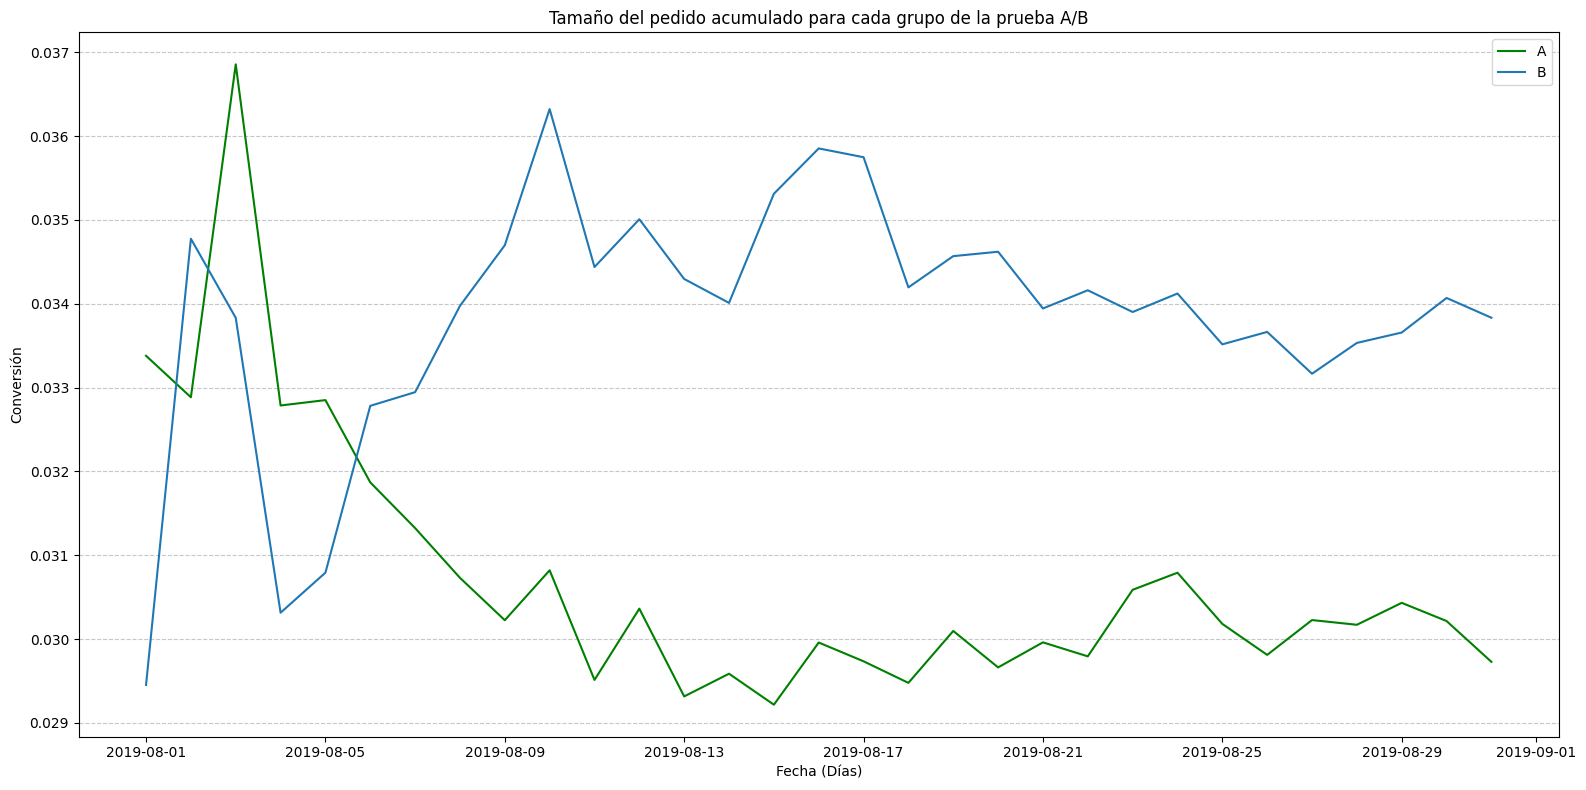

In [24]:
# Realizar la gráfica de las tasas de conversión diarias de los dos grupos 

plt.figure(figsize=[16, 8])
plt.plot(cumulative_dataA['date'], cumulative_dataA['conversion'], label='A', color='green')
plt.plot(cumulative_dataB['date'], cumulative_dataB['conversion'], label='B')
plt.title('Tamaño del pedido acumulado para cada grupo de la prueba A/B')
plt.xlabel('Fecha (Días)')
plt.ylabel('Conversión')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()

<div class="alert alert-block alert-success">
<b>Celda [24]</b> <a class="tocSkip"></a><br>
La gráfica de las tasas de conversión diarias es una excelente herramienta para visualizar el rendimiento de los grupos A y B. Esto es fundamental para evaluar el impacto de las pruebas A/B y entender las diferencias en el comportamiento de los usuarios entre grupos.
</div>


Se calculó la tasa de conversión de cada grupo de acuerdo a la relación de las órdenes y el número de visitas. Luego se realizó un filtrado con indexación lógica para obtener esta realción para cada uno de los grupos y porderlas graficar.

De la gráfica se oberva lo siguiente
1. La conversión para los del grupo A inició en descenso, aunque entre los días 3-4 se presentó un pico alto llegando a alcanzar una tasa de conversión de casi 0.037, a partir de esos días, la tasa de conversión fue en descenso hasta ir presentando una tendencia de estabilización con un valor entre los 0.0298 y 0.0308.
2. La conversión para los del grupo B inició en aumento, después del día 2 tuvo un decremento en la conversión hasta el día 4 con un valor en la tasa de conversión del 0.0304 aproximadamente. A partir de este día aumentó hasta los días 10-11, luego fue presentando una tendencia a la estabilización con valores en la tasa de conversión entre 0.0333 y 0.034
3. Los valores de la tasa de conversión para el grupo B fueron siempre mayores a partir del 6 de agosto aproximadamente con relación a la tasa de conversión del grupo A.
4. Al final del análisis, el comportamiento de las tasas de conversión para ambos grupos auque puede observarse como una tendencia a la estabilización, para el último día de la prueba, 31 de agosto, en ambos grupos la tendencia es la disminución en la tasa de conversión.
   

### **2.5. Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.**

In [25]:
# Encontrar los pedidos por usuarios

ordersByUsers = orders.drop(['date', 'revenue', 'group'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})

ordersByUsers.columns = ['user_id', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head()

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


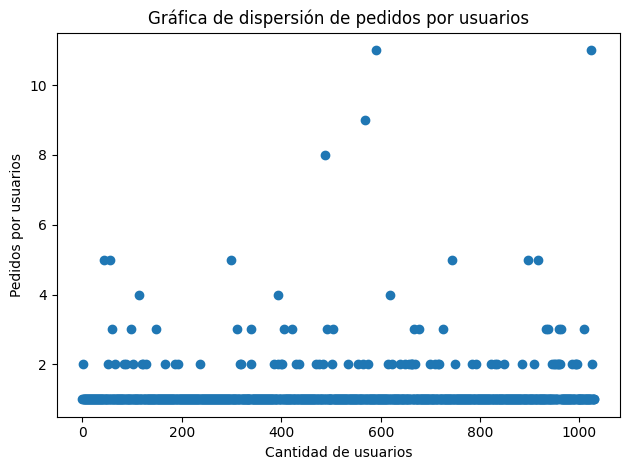

In [26]:
# Realizar la gráfica de los pedidos por usuarios

x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Gráfica de dispersión de pedidos por usuarios')
plt.xlabel('Cantidad de usuarios')
plt.ylabel('Pedidos por usuarios')
plt.tight_layout()
plt.show()

## Se obtuvo un DataFrame 'ordersByUsers' agrupando del la tabla de 'orders' por la columna de 'visitorId' y aplicando la función de agregación de valores únicos a la columna 'transactionId'. A las columnas resultates se les nombró 'user_id' y 'orders'.

Del DataFrame 'ordersByUsers' se realizó la gráfica de dispersión del número de pedidos por usuario, de la cual se observa lo siguiente:
1. La mayor cantidad de usuarios realizó menos de 2 pedidos por compra.
2. Un número considerable de usuarios, llegó a realizar dos pedidos en cada compra.
3. Algunos pocos usuarios, realizaron entre 3 y 4 pedidos en cada compra.
4. Se observan valores que se pueden considerar valores anómalos, debido a que muy pocos usuarios realizaron pedidos de compra grandes notandose pedidos de 5, 8 o incluso 10 en el tamaño de la compra.
5. Se podría considerar hasta un valor de 2 del tamaño de la comprar por los usuarios, los demás datos tienden a alterar el estudio de pa prueba por ser valores muy poco frecuentes considerandose como valores anómalos.


### **2.6. Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.**

In [27]:
# Calcular los percentiles del número de pedidos npor usuarios

print('Los percentiles 90, 95 y 99 del número de pedidos por usuarios son:', np.percentile(ordersByUsers['orders'], [90, 95, 99]))

Los percentiles 90, 95 y 99 del número de pedidos por usuarios son: [1. 2. 4.]


De estos percentiles se puede concluir lo siguiente:
1. El 90% de los usuarios han realizado 1 pedido. También se puede entender de otra forma, solo el 10% de tus usuarios han hecho más de 1 pedido. Esto puede indicar la gran mayoría de tus usuarios son compradores de una sola vez o de muy baja frecuencia.
2. El 95% de los usuarios han realizado 2 pedidos o menos. Analizando de otro forma, se puede decir que sólo el 5% de los usuarios han hecho más de 2 pedidos.
3. El 99% de tus usuarios han realizado 4 pedidos o menos. Viéndolo desde otra perspertiva, solamente el 1% de los usuarios han realizado más de 4 pedidos. 

### **2.7. Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.**

In [28]:
# Ordenar el DataFrame 'orders' por la columna de 'revenue'

orders.sort_values(by='revenue', ascending=False).head()

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B
1196,3936777065,2108080724,2019-08-15,3120.1,B
858,192721366,1316129916,2019-08-27,1450.2,A
1136,666610489,1307669133,2019-08-13,1425.8,A
744,3668308183,888512513,2019-08-27,1335.6,B


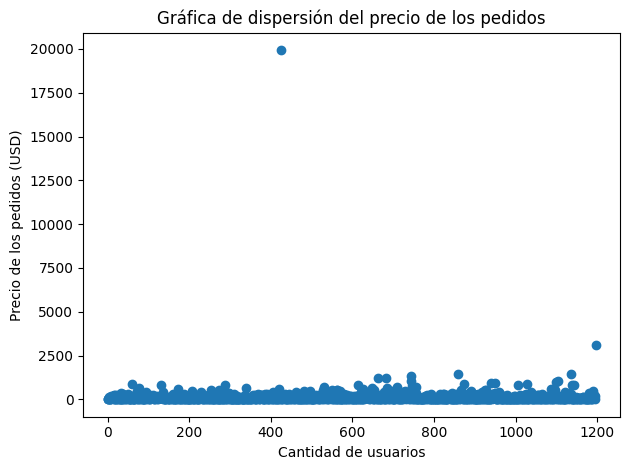

In [29]:
# Realizar la gráfica de dispersión del precio de los pedidos

x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])
plt.title('Gráfica de dispersión del precio de los pedidos')
plt.xlabel('Cantidad de usuarios')
plt.ylabel('Precio de los pedidos (USD)')
plt.tight_layout()
plt.show()

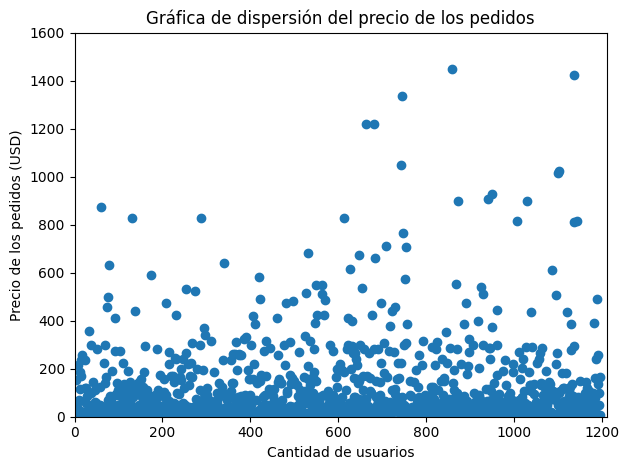

In [30]:
# Mejorar visualización de la gráfica de dispersión con nuevos límite en el eje y

plt.scatter(x_values, orders['revenue'])
plt.title('Gráfica de dispersión del precio de los pedidos')
plt.xlabel('Cantidad de usuarios')
plt.ylabel('Precio de los pedidos (USD)')
plt.axis([0, 1210, 0, 1600])
plt.tight_layout()
plt.show()

Para realizar la gráfica de dispersión de los precios de los pedidos, se ordenó el DataFrame de 'orders por el la columna 'revenue'.

De la gráfica de dispersión de los precios de los pedidos obtenida inicialmente, se observan dos puntos anómalos con valores de 2500 USD y 20000 USD alterando el resultado de las pruebas. Por lo tanto, para poder analizar con mejor detalle la mayor concentración de puntos, se realizó una nueva gráfica de dispersión pero delimitando tanto en el eje X (cantidad de usuarios hasta 1210), como en el eje y (precio de los pedidos hasta 1600).

De la nueva gráfica de dispersión se puede observar que la mayor concentración de puntos, se presentan por debajo de los 200 USD, unos valores considerables entre los 200 USD y 600 USD, y una menor cantidad de pedidos entre los 600 USD y 1500 USD.

### **2.8. Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.**

In [31]:
# Calcular los percentiles de los precios de los pedidos

print('Los percentiles 90, 95 y 99 de los precios de pedidos son:', np.percentile(orders['revenue'], [90, 95, 99]))

Los percentiles 90, 95 y 99 de los precios de pedidos son: [282.48  435.54  900.904]


<div class="alert alert-block alert-warning">
<b>Celda [31]</b> <a class="tocSkip"></a><br>
Al calcular los percentiles de los precios de los pedidos, es importante identificar y manejar posibles valores atípicos. Estos valores pueden influir desproporcionadamente en el análisis y llevar a conclusiones erróneas si no se gestionan adecuadamente.
</div>


De los percentiles de los prcios de los productos se puede concluir lo siguiente:

1. El 90% de los pedidos tienen un precio de 282.48 USD o menos. Visto de otra manera, se puede decir que solo el 10% de los pedidos tienen un precio superior a 282.48 USD.
2. El 95% de los pedidos tienen un precio de 435.54 USD o menos. Analizado de otra forma se puede decir que solo el 5% de los pedidos tienen un precio superior a 435.54 USD.
3. El 99% de los pedidos tienen un precio de 900.904 USD o menos. También se puede analizar de que solo el 1% de los pedidos tienen un precio superior a 900.904 USD. Estos son los pedidos de mayor valor, mostrando de esta manera el umbral superior donde se encuentran las transacciones más costosas.

### **2.9. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.**

In [32]:
# Obtener DataFrame con la identificación del los usuarios y las ordenes de cada un para cada grupo de la prueba A/B

ordersByUsersA = orders[orders['group'] == 'A']
ordersByUsersA = ordersByUsersA.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group'] == 'B']
ordersByUsersB = ordersByUsersB.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
ordersByUsersB.columns = ['visitorId', 'orders']

display(ordersByUsersA)
display(ordersByUsersB)

,visitorId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1
...,...,...
581,4258103007,1
582,4266935830,1
583,4279090005,1
584,4281247801,1


In [33]:
# Encontrar las órdenes para cada uno de los grupos A y B

ordersA = pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')

ordersB = pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')

sampleA = pd.concat([ordersByUsersA['orders'], ordersA], axis=0)

sampleB = pd.concat([ordersByUsersB['orders'], ordersB], axis=0)

display(sampleA)
display(sampleB)

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18736, dtype: int64

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18916, dtype: int64

In [34]:
# Encontrar la significancia estadística de la diferencia en la conversión entre los grupos

print('La significancia estadística, valor p es:', '{0:.4f}'.format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('La proporción de la conversión entre A y B es:', '{0:.4f}'.format(sampleB.mean() / sampleA.mean() -1))

La significancia estadística, valor p es: 0.0168
La proporción de la conversión entre A y B es: 0.1381


<div class="alert alert-block alert-success">
<b>Celda [34]</b> <a class="tocSkip"></a><br>
Has calculado correctamente la significancia estadística para la diferencia en la conversión entre los grupos. Este análisis es clave para validar los resultados de la prueba A/B y determinar si las diferencias observadas son estadísticamente significativas.
</div>


Para encontrar la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto, se crearon dos DataFrame 'ordersByUsersA' y 'ordersByUsersB' a partir del DataFrame 'orders' y agrupando por 'visitorID' y los valores únicos de las transacciones.

Luego se obtuvieron las órdenes para cada grupo y posterirmente poder calcular la significancia estadística y la relación de proporción entre los grupos A y B.

El valor p obtenido fue de 0.0168, siendo un valor menor que alpha=0.05, valor estandar que se emplea en la mayoria de los análisis estadísticos. Esto quiere decir que se puede rechazar la Hipótesis nula pues se puede sugerir que la diferencia en la conversión entre los grupos es estadísticamente significativa. Es decir, la diferencia observada es probablemente real entre los grupos analizados.

En cuanto al valor de la proporción de la conversión, el valor obtenido es de 0.1381, lo cual significa que la conversión (o el promedio de pedidos por usuario en cada sesión) del grupo B es un 13.81% mayor que la del grupo A. este valor es un número positivo, indicando que el grupo B tuvo un mejor rendimiento en la métrica de conversión que el grupo A.

### **2.10. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.**

In [41]:
# Encontrar la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos

print('La significancia estadística, valor p es:', '{0:.4f}'.format(st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]))

print('La proporción del tamaño de los pedidos entre A y B es:', '{0:.4f}'.format(orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() -1))

La significancia estadística, valor p es: 0.6915
La proporción del tamaño de los pedidos entre A y B es: 0.2517


La Hipótesis nula es donde se asume que no hay una diferencia real entre los grupos.

Sin embargo, analizando el valor p obtenido con un valor de 0.6915, se encuentra que es un valor mucho mayor a alpha = 0.05, valor estandar utilizado para la mayoría de las pruebas estadísticas. Esto significa que hay una alta probabilidad, 69.15% aproximadamente, de que la diferencia observada en el tamaño promedio de pedido entre el Grupo A y el Grupo B sea simplemente debido al azar.

Por lo tanto, no se puede rechazar la hipótesis nula. Esto significa que la diferencia en el tamaño promedio de pedido entre los grupos no es estadísticamente significativa. No se tiene suficiente evidencia para afirmar que el cambio en el Grupo B tuvo un impacto real en el tamaño de los pedidos.

### **2.11. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.**

In [36]:
# Identificar a los usuarios anómalos

usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] >  2]['visitorId'], 
    ordersByUsersB[ordersByUsersB['orders'] >  2]['visitorId']], 
    axis=0)

usersWithExpensiveOrders = orders[orders['revenue'] > 435]['visitorId']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

abnormalUsers

1099     148427295
18       199603092
928      204675465
23       237748145
37       249864742
           ...    
723     4009017467
627     4120364173
743     4133034833
499     4256040402
662     4266935830
Name: visitorId, Length: 75, dtype: int64

In [37]:
# Preparar los datos excluyendo a los usuarios anómalos 

sampleAFiltered = pd.concat([
    ordersByUsersA[np.logical_not(
        ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'], 
    pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), 
              name='orders')], axis=0)

sampleBFiltered = pd.concat([
    ordersByUsersB[np.logical_not(
        ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'], 
    pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(ordersByUsersB['orders'])), 
              name='orders')], axis=0)

display(sampleAFiltered)
display(sampleBFiltered)

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18690, dtype: int64

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18868, dtype: int64

In [38]:
# Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados

print('La significancia estadística, valor p es:', '{0:.4f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print('La proporción de la conversión entre A y B es:', '{0:.4f}'.format(sampleBFiltered.mean() / sampleAFiltered.mean() -1))

La significancia estadística, valor p es: 0.0142
La proporción de la conversión entre A y B es: 0.1707


<div class="alert alert-block alert-warning">
<b>Celda [38]</b> <a class="tocSkip"></a><br>
La exclusión de usuarios anómalos es un enfoque adecuado para obtener resultados más precisos. Asegúrate de documentar claramente este proceso y sus implicaciones en tus conclusiones finales, ya que puede afectar la interpretación de los resultados.
</div>


Para encontrar la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados, primero que todo fue necesario identificar los usuarios anómalos, aquellos que aportan valores atípicos en ambos grupos.

Para ello se realizó un filtrado para indentificar los usuarios con muchos pedidos, de la gráfica de dispersión de pedidos por usuarios y de los valores de los percentiles, se estableció que el valor límite de los pedidos sería 2, así que los susuarios anómalos serián los que tuvieron compras mayores a 2 pedidos, es decir quienes realizaron 3 pedidos o más. 

Luego se filtró por los usuarios que tuvieron pedidos muy costosos, por la gráfica de dispersión de precios de los pedidos y por los percentiles, se estableció el límite del percentil 95 con un valor de 435 USD, es decir que los usuarios que presentarios comprar con valores superiores a este valor fueron consideraros anómalos.

Por último se unieron ambas tablas en un solo DataFrame llamado 'abnormalUsers'.

Luego se preapraon los datos para excluir los usuarios anómalos y así poder obtener el valor de la significancia estadística y de la proporción de la conversión entre los grupos A y B con los datos sin valores atípicos o usuarios anómalos.

El valor p obtenido fue de 0.0142, siendo un valor menor que alpha=0.05, valor estandar que se emplea en la mayoria de los análisis estadísticos. Esto quiere decir que se puede rechazar la Hipótesis nula pues se puede sugerir que la diferencia en la conversión entre los grupos es estadísticamente significativa. Es decir, la diferencia observada es probablemente real entre los grupos analizados.

En cuanto al valor de la proporción de la conversión, el valor obtenido es de 0.1707, lo cual significa que la conversión (o el promedio de pedidos por usuario en cada sesión) del grupo B es un 17.07% mayor que la del grupo A. Este valor es un número positivo, indicando que el grupo B tuvo un mejor rendimiento en la métrica de conversión que el grupo A inclusive con los valores ya filtrados y excentos de los valores anómalos.

### **2.12. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.**

In [39]:
# Encontrar la significancia estadística de la diferencia en el tamaño promedio de pedido entre los 
# grupos utilizando los datos filtrados

print('La significancia estadística, valor p es:', '{0:.4f}'.format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group'] == 'A', 
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], 
    orders[np.logical_and(
        orders['group'] == 'B', 
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('La proporción del tamaño de los pedidos entre A y B es:', '{0:.4f}'.format(
    orders[np.logical_and(
        orders['group'] == 'B', 
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() / 
    orders[np.logical_and(
        orders['group'] == 'A', 
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() -1))

La significancia estadística, valor p es: 0.7500
La proporción del tamaño de los pedidos entre A y B es: -0.0270


Ahora, después de realizar la exclusión de los usuarios anómalos de los dotas analizados se obtienen los siguientes valor de significacia en realción a la diferencia en el tamaño promedio de pedido entre los grupos.

Analizando el valor p obtenido con un valor de 0.750, se encuentra que es un valor mucho mayor a alpha = 0.05, valor estandar utilizado para la mayoría de las pruebas estadísticas. Esto significa que hay una alta probabilidad, aproximadamente 75%, de que la diferencia observada en el tamaño promedio de pedido entre el Grupo A y el Grupo B sea simplemente debido al azar.

Por lo tanto, no se puede rechazar la hipótesis nula. Esto significa que la diferencia en el tamaño promedio de pedido entre los grupos no es estadísticamente significativa. No se tiene suficiente evidencia para afirmar que el cambio en el Grupo B tuvo un impacto real en el tamaño de los pedidos.

En cuanto a la proporción entre los tamaño de los pedidos de A y B se obtubo en valor negativo para B de 2.7%, pudiendo indicar que la proporción antes del filtrado de pudo deber a los valores atípicos de los usuarios anómalos.

### **2.13. Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son:** 
1. Parar la prueba, considerar a uno de los grupos como líder.
2. Parar la prueba, concluir que no hay diferencia entre los grupos.
3. Continuar la prueba.

Con base en las sirnificancias estadísticas de la diferencia de la conversión entre los grupos y la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos, antes y después con los datos en estado narural y después de excluir losusuarios anómalos (con muchas comprar y elevados precios de los pedidos) puedo concluir lo siguiente:

1. La diferencia relativa en la conversión aumentó de +13.81% con los datos en bruto a +17.07% después de filtrar a los usuarios anómalos. Mientras que la significancia estadística, valor p, pasó de 0.0168 a 0.0142. Dado que 0.0142 es significativamente menor que el valor de significacina alpha = 0.05, esto reafirma con mayor confianza estadística que la diferencia en la conversión entre el Grupo A y el Grupo B es real y no se debe al azar. El filtrado de usuarios anómalos ha validado y rforzado lo encontrado anteriormente.

Por lo tanto, se puede concluir con mayor seguridad que el grupo B no solo tiene una conversión superior, sino que la magnitud de esa mejora es aún mayor de lo que se obtuvo con los datos en bruto, una vez que se eliminaron los datos de los valores atípicos.

Esto puede sugerir que los cambios implementados en el Grupo B tienen un impacto positivo en la tasa 
de conversión para la mayoría de nuestros usuarios.


2. La comparación de la proporción de la diferencia en el tamaño promedio de pedido con los datos en bruto fue de 25.17% y después de eliminar los usuario anómalos fue de -2.70%. Esta es una gran diferencia que puede causar gran inquietud pues antes el tamaño promedio del pedido para el grupo B era de 25.17% mayor en comparación al grupo A, después del filtrado es de 2.7% por debajo del grupo A.

Esto puede indicar que la aparente ese 25.17% en el tamaño promedio de pedido del grupo B en el análisis sin filtrar era impulsado por los usuarios atípicos con pedidos muy grandes y costosos. Una vez excluido el impacto de los usuarios anómalos,se puede decir que el tamaño promedio de pedido para los usuarios estandar es muy similar entre ambos grupos, con una ligera desventaja para el grupo B.

De lo anterior se puede concluir que los cambios implementados en el grupo B no tuvieron un impacto positivo en el tamaño del pedido promedio para la mayoría de los usuarios. 


Ahora, respondiendo a la pregunta de este punto y como conclusión general de este proyecto, mi respuesta es:
1. Parar la prueba, considerar a uno de los grupos como lider, siendo el grupo B el seleccionado como grupo lider.

El grupo B presenta una mejora clara y estadísticamente significativa de 17.07% en la tasa de conversión, con alta confianza. El filtrado de los usuarios anómalos reafirmó y fortaleció esta conclusión. La mejora en la conversión para el grupo B es aún más marcada y la confianza estadística es mayor. Esto sugiere que los cambios en el grupo B tienen un impacto positivo en la probabilidad de que un usuario realice un pedido.
En cuanto al tamaño promedio de pedido, se puede decir que no hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos. El cambio no parece afectar negativamente esta métrica para el usuario promedio.

Continuar con la prueba despues de 1 en estudio conlleva seguir teniendo gastos de recursos económicos y tiempo sin que se asegure que los datos para el grupo B cambien drásticamente. Es muy importante tener en cuenta que puede ser muy beneficioso para la empresa implementar los cambios del grupo B por los ganancia que trae la conversión justificando de esta forma la implementación.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Constanza! A lo largo del proyecto has demostrado habilidades sólidas en varios aspectos:<br><br>
• Implementaste correctamente las métricas ICE y RICE para priorizar las hipótesis, lo cual es crucial para la toma de decisiones.<br>
• Cargaste y preparaste los datos de manera eficiente, asegurando su integridad y formato adecuado para el análisis.<br>
• Realizaste conversiones de tipos de datos necesarias para el análisis temporal, mejorando la precisión de tus resultados.<br>
• Uniste DataFrames de manera efectiva para crear conjuntos de datos acumulados, facilitando el análisis comparativo.<br>
• Visualizaste el ingreso acumulado y las tasas de conversión de manera clara, proporcionando una buena comprensión de las tendencias.<br>
• Calculaste la significancia estadística con precisión para validar las pruebas A/B, asegurando la validez de tus conclusiones.<br>
• Identificaste y manejaste usuarios anómalos, mejorando la precisión del análisis.<br>
• Documentaste el proceso de análisis con claridad, lo que es esencial para la reproducibilidad y comprensión del proyecto.<br>
• Mantuviste un enfoque estructurado y lógico a lo largo del proyecto, mostrando un buen entendimiento de las pruebas A/B y su interpretación.<br>
¡Felicidades!
</div>
